![](imagenes/UC_FMRI.jpg)

---

---

***Andres Eduardo Aracena Rangel***

*Estudiante del programa del Magister en Física Médica*

---

---

El siguiente Script de Python forma parte del trabajo especial de grado.

Profesora Guía:

*PhD María Daniela Cornejo*

---

---

# Interfaces ExtractROI, BET, FAST de FSL

Script de Python adicional, donde se da varios ejemplos aplicando diversas interfaces a las imágenes en estudio

## Importamos Librerias

In [1]:
import time # medir el tiempo de ejecución de nuestros programas
start = time.process_time()
inicio = time.time()

In [2]:
import os # El módulo os nos permite acceder a funcionalidades dependientes del Sistema Operativo
from os.path import join as opj # Este método concatena varios componentes de ruta con exactamente un separador de directorio(‘/’)

import nibabel as nib # Acceso de letcura/escritura y visualización de algunos formatos comunes de neuroimagen

In [3]:
import os # El módulo os nos permite acceder a funcionalidades dependientes del Sistema Operativo
from os.path import join as opj # Este método concatena varios componentes de ruta con exactamente un separador de directorio(‘/’)

import nibabel as nib # Acceso de letcura/escritura y visualización de algunos formatos comunes de neuroimagen

## Importamos parámetros

In [4]:
'''
Ruta del directorio de la data
'''
path_data = '/home/aracena/data/'

'''
Ruta donde reposa las imágenes anatómicas
'''
# Estudio ds001454
path_ds001454 = opj(path_data,'ds001454','sub-01','ses-1')
path_ana_ds001454 = opj(path_ds001454, 'anat','sub-01_ses-1_T1w.nii.gz')
#sub-01_ses-1_T1w.json

# Estudio ds002422
path_ds002422 = opj(path_data,'ds002422','sub-01')
path_ana_ds002422 = opj(path_ds002422, 'anat', 'sub-01_T1w.nii')
#T1w.json

# Estudio ds004101
path_ds004101 = opj(path_data,'ds004101','sub-09114','ses-1pre')
path_ana_ds004101 = opj(path_ds004101,'anat', 'sub-09114_ses-1pre_T1w.nii.gz')
#T1w.json

'''
Ruta donde reposa las imágenes fisiológicas
'''
# Estudio ds001454
path_fis_ds001454 = opj(path_ds001454, 'func','sub-01_ses-1_task-rest_run-01_bold.nii.gz')

# Estudio ds002422
path_fis_ds002422 = opj(path_ds002422, 'func', 'sub-01_task-rest_bold.nii.gz')

# Estudio ds004101
path_fis_ds004101 = opj(path_ds004101, 'func', 'sub-09114_ses-1pre_task-rest_bold.nii.gz')

'''
Ruta donde se guardaran los resultados
'''
path_expe = '/home/aracena/thesis_ds002422/01_fase1_extraccion_mask_brain/'

path_output = opj(path_expe,'01_00_interfaces_flujo_trabajo', 'output')

# Crear la(s) carpeta(s) de salida
os.system('mkdir -p %s'%path_output);

## Cargamos imagenes anatomica y fisiologica

In [5]:
dic_ds001454 = {'anatomica_ds001454': nib.load(path_ana_ds001454), 
                'fisiologica_ds001454': nib.load(path_fis_ds001454)}

dic_ds002422= {'anatomica_ds002422': nib.load(path_ana_ds002422), 
                'fisiologica_ds002422': nib.load(path_fis_ds002422)}

dic_ds004101= {'anatomica_ds004101': nib.load(path_ana_ds004101), 
                'fisiologica_ds004101': nib.load(path_fis_ds004101)}

## Interface ExtractROI - FSL

In [6]:
from nipype.interfaces.fsl import ExtractROI

220720-20:04:48,543 nipype.utils WARNING:
	 A newer version (1.8.3) of nipy/nipype is available. You are using 1.7.0


In [7]:
#ExtractROI?

In [8]:
extract = ExtractROI(in_file = path_fis_ds004101,
                     t_min=4,
                     t_size=-1, 
                     output_type='NIFTI',
                     roi_file = opj(path_output, 'sub-09114_ses-1pre_task-rest_bold_roi.nii'))
res = extract.run()

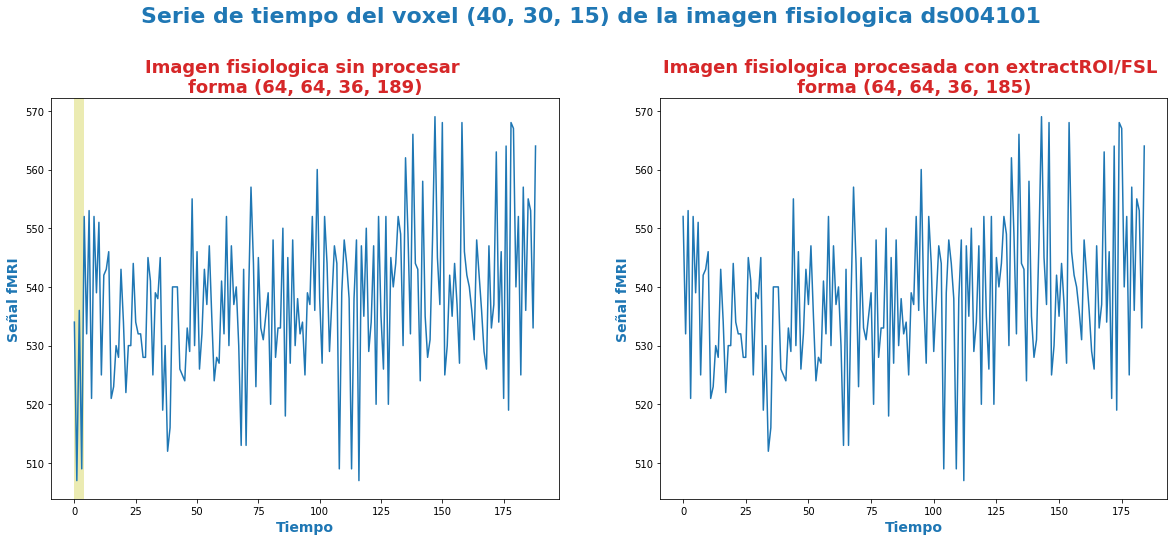

In [9]:
import pylab as plt 
import nibabel as nb 

img_ori = dic_ds004101['fisiologica_ds004101']
img_proce_extract = nib.load(opj(path_output,'sub-09114_ses-1pre_task-rest_bold_roi.nii'))

font1 = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'}
font2  = {'fontsize':18, 'fontweight':'bold', 'color':'tab:red'}
titulo = "Serie de tiempo del voxel (40, 30, 15) de la imagen fisiologica ds004101"

vent_min = 0
vent_max = 4

fig, ax = plt.subplots(1,2, figsize = (20,8))
fig.suptitle(titulo, fontweight ="bold", fontsize = 22, color = 'tab:blue')
ax[0].plot(img_ori.get_fdata()[ 40, 30, 15 ,: ])
ax[0].set_title('Imagen fisiologica sin procesar \nforma '+str(img_ori.shape), 
                fontdict=font2)
ax[0].axvspan(vent_min,vent_max, alpha=0.3, facecolor='y')

ax[1].plot(img_proce_extract.get_fdata()[ 40, 30, 15 ,: ])
ax[1].set_title('Imagen fisiologica procesada con extractROI/FSL \nforma '+str(img_proce_extract.shape), 
                fontdict=font2)
for i in range(2):
    ax[i].set_xlabel('Tiempo',fontdict=font1)
    ax[i].set_ylabel('Señal fMRI',fontdict=font1)
    
plt.subplots_adjust(#left=0.5,
                    #bottom=0.5, 
                    #right=0.7,        
                    #hspace=0.3,
                    top=0.82)
plt.savefig(opj(path_output,titulo+'.png'))
plt.show()

## Interface BET - FSL

In [10]:
from nipype.interfaces.fsl import BET

In [11]:
#BET?

In [12]:
skullstrip = BET(in_file = path_ana_ds004101,
                 out_file = opj(path_output, 'T1w_nipype_bet.nii.gz'))
res2 = skullstrip.run()                 

/home/aracena/.local/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


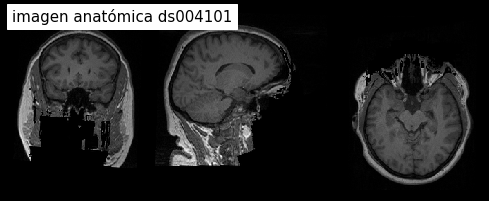

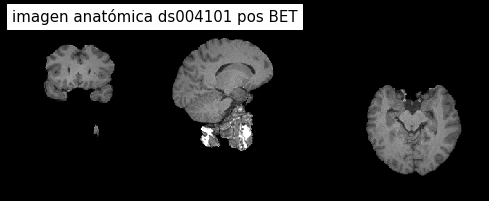

In [13]:
from nilearn.plotting import plot_anat

plot_anat(path_ana_ds004101, title='imagen anatómica ds004101', 
          cut_coords=(14,15,18), display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

plot_anat(opj(path_output, 'T1w_nipype_bet.nii.gz'), title='imagen anatómica ds004101 pos BET', 
          cut_coords=(14,15,18), display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

## Interface FAST - FSL

In [14]:
from nipype.interfaces.fsl import FAST

In [15]:
#FAST.help()

In [16]:
segmentation = FAST(in_files = opj(path_output, 'T1w_nipype_bet.nii.gz'),
                    output_type='NIFTI_GZ')
res3 = segmentation.run()

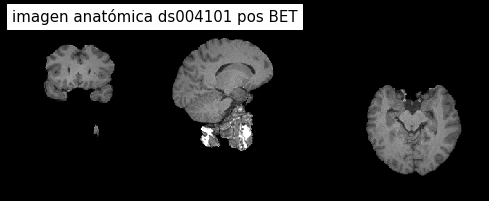

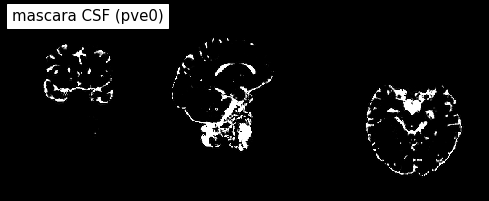

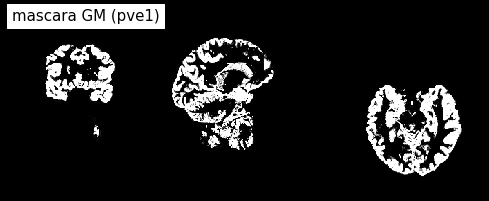

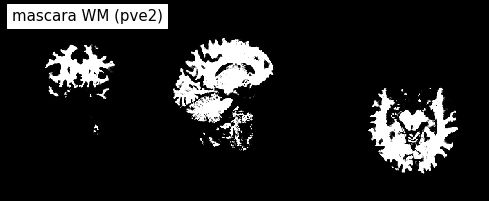

In [17]:
plot_anat(opj(path_output, 'T1w_nipype_bet.nii.gz'), title='imagen anatómica ds004101 pos BET', 
          cut_coords=(14,15,18), display_mode='ortho', dim=-1, draw_cross=False, annotate=False);
plot_anat(opj(path_output, 'T1w_nipype_bet_pve_0.nii.gz'), title='mascara CSF (pve0)', 
          cut_coords=(14,15,18), display_mode='ortho', dim=-1, draw_cross=False, annotate=False);
plot_anat(opj(path_output, 'T1w_nipype_bet_pve_1.nii.gz'), title='mascara GM (pve1)', 
          cut_coords=(14,15,18), display_mode='ortho', dim=-1, draw_cross=False, annotate=False);
plot_anat(opj(path_output, 'T1w_nipype_bet_pve_2.nii.gz'), title='mascara WM (pve2)', 
          cut_coords=(14,15,18), display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

## FIN